In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [3]:
w = 1.0
# our model for the forward pass
def forward(x):
    return x * w

In [4]:
def loss(x, y):
    y_pred  = forward(x)
    return (y_pred - y) ** 2

w=0.1
	 1.0 2.0 0.1 1
	 2.0 4.0 0.2 1
	 3.0 6.0 0.30000000000000004 1
MSE= 1.0
w=0.2
	 1.0 2.0 0.2 1
	 2.0 4.0 0.4 1
	 3.0 6.0 0.6000000000000001 1
MSE= 1.0
w=0.30000000000000004
	 1.0 2.0 0.30000000000000004 1
	 2.0 4.0 0.6000000000000001 1
	 3.0 6.0 0.9000000000000001 1
MSE= 1.0
w=0.4
	 1.0 2.0 0.4 1
	 2.0 4.0 0.8 1
	 3.0 6.0 1.2000000000000002 1
MSE= 1.0
w=0.5
	 1.0 2.0 0.5 1
	 2.0 4.0 1.0 1
	 3.0 6.0 1.5 1
MSE= 1.0
w=0.6
	 1.0 2.0 0.6 1
	 2.0 4.0 1.2 1
	 3.0 6.0 1.7999999999999998 1
MSE= 1.0
w=0.7000000000000001
	 1.0 2.0 0.7000000000000001 1
	 2.0 4.0 1.4000000000000001 1
	 3.0 6.0 2.1 1
MSE= 1.0
w=0.8
	 1.0 2.0 0.8 1
	 2.0 4.0 1.6 1
	 3.0 6.0 2.4000000000000004 1
MSE= 1.0
w=0.9
	 1.0 2.0 0.9 1
	 2.0 4.0 1.8 1
	 3.0 6.0 2.7 1
MSE= 1.0
w=1.0
	 1.0 2.0 1.0 1
	 2.0 4.0 2.0 1
	 3.0 6.0 3.0 1
MSE= 1.0
w=1.1
	 1.0 2.0 1.1 1
	 2.0 4.0 2.2 1
	 3.0 6.0 3.3000000000000003 1
MSE= 1.0
w=1.2000000000000002
	 1.0 2.0 1.2000000000000002 1
	 2.0 4.0 2.4000000000000004 1
	 3.0 6.0 3.60000000000000

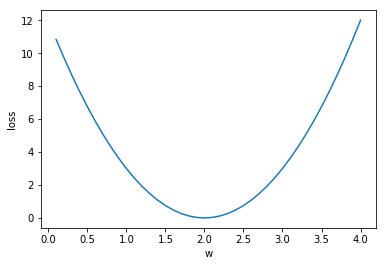

In [5]:
w_list = []
mse_list = []

for w in np.arange(0.1, 4.1, 0.1):
    print(f'w={w}')
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += 1
        print("\t", x_val, y_val, y_pred_val, 1)
    print("MSE=", l_sum / 3)
    w_list.append(w)
    mse_list.append(l / 3)
        
plt.plot(w_list, mse_list)
plt.ylabel('loss')
plt.xlabel('w')
plt.show()
    

#### How to find right 'w' value that minimizes the error (lost function) (with gradient descent) 
in this case it should be 2.0

In [6]:
def gradient(x, y):
    return 2*x*(x*w-y)

In [7]:
forward(4)

16.0

In [8]:
for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        print("\tgrad:", x_val, y_val, grad)
        l = loss(x_val, y_val)
        
    print("progress:", epoch, "w:", w, "loss:", l)

    

	grad: 1.0 2.0 4.0
	grad: 2.0 4.0 15.68
	grad: 3.0 6.0 32.4576
progress: 0 w: 3.478624 loss: 19.676960400383997
	grad: 1.0 2.0 2.957248
	grad: 2.0 4.0 11.592412159999999
	grad: 3.0 6.0 23.996293171199994
progress: 1 w: 3.093164466688 loss: 10.755076961063336
	grad: 1.0 2.0 2.186328933376
	grad: 2.0 4.0 8.570409418833922
	grad: 3.0 6.0 17.74074749698622
progress: 2 w: 2.808189608196039 loss: 5.878533985164606
	grad: 1.0 2.0 1.6163792163920778
	grad: 2.0 4.0 6.336206528256945
	grad: 3.0 6.0 13.115947513491879
progress: 3 w: 2.59750427561463 loss: 3.2131022343998725
	grad: 1.0 2.0 1.19500855122926
	grad: 2.0 4.0 4.6844335208187005
	grad: 3.0 6.0 9.696777388094706
progress: 4 w: 2.4417420810132033 loss: 1.7562245952408806
	grad: 1.0 2.0 0.8834841620264067
	grad: 2.0 4.0 3.463257915143515
	grad: 3.0 6.0 7.168943884347076
progress: 5 w: 2.326585221398034 loss: 0.9599211615204248
	grad: 1.0 2.0 0.6531704427960676
	grad: 2.0 4.0 2.560428135760585
	grad: 3.0 6.0 5.30008624102441
progress: 6 w: 

In [9]:
forward(4)

8.000000000000611

In [10]:
w ## almost right value

2.0000000000001528

### Pytorch Lecture 4: Back-propagation and Autograd

In [11]:
import torch
from torch.autograd import Variable

In [12]:
w = Variable(torch.tensor([1.0]), requires_grad = True)

In [13]:
w

tensor([1.], requires_grad=True)

In [14]:
print("predict(before training):", 4, forward(4).data[0])
for epoch in range(15):
    for x_val, y_val in zip (x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
        print('\tgrad:', x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data
        
        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
    print("progress:", epoch, l.data[0])
print("predict(after training):", 4, forward(4).data[0])

predict(before training): 4 tensor(4.)
	grad: 1.0 2.0 tensor(-2.)
	grad: 2.0 4.0 tensor(-7.8400)
	grad: 3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad: 1.0 2.0 tensor(-1.4786)
	grad: 2.0 4.0 tensor(-5.7962)
	grad: 3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad: 1.0 2.0 tensor(-1.0932)
	grad: 2.0 4.0 tensor(-4.2852)
	grad: 3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad: 1.0 2.0 tensor(-0.8082)
	grad: 2.0 4.0 tensor(-3.1681)
	grad: 3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad: 1.0 2.0 tensor(-0.5975)
	grad: 2.0 4.0 tensor(-2.3422)
	grad: 3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad: 1.0 2.0 tensor(-0.4417)
	grad: 2.0 4.0 tensor(-1.7316)
	grad: 3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad: 1.0 2.0 tensor(-0.3266)
	grad: 2.0 4.0 tensor(-1.2802)
	grad: 3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad: 1.0 2.0 tensor(-0.2414)
	grad: 2.0 4.0 tensor(-0.9465)
	grad: 3.0 6.0 tensor(-1.9592)
progress: 7 tensor(0.1066)
	gr

### Linear regression in pytorch way

In [15]:
#data definition
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

In [16]:
#model class in pytorch
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1,1) #one input, one output
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
model = Model()

In [17]:
## construct loss and optimizer
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
#the call to model.parameters() in sgd constructor will contain the 
#learnable parameters of the two nn.linear modules which are member of
#the model

/home/zak/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [18]:
#Training :forward, loss, backward, step
for epoch in range(500):
    
    y_pred = model.forward(x_data)
    
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

0 tensor(41.3042)
1 tensor(18.4510)
2 tensor(8.2765)
3 tensor(3.7462)
4 tensor(1.7286)
5 tensor(0.8295)
6 tensor(0.4284)
7 tensor(0.2490)
8 tensor(0.1683)
9 tensor(0.1315)
10 tensor(0.1144)
11 tensor(0.1059)
12 tensor(0.1014)
13 tensor(0.0986)
14 tensor(0.0965)
15 tensor(0.0949)
16 tensor(0.0934)
17 tensor(0.0920)
18 tensor(0.0907)
19 tensor(0.0893)
20 tensor(0.0881)
21 tensor(0.0868)
22 tensor(0.0855)
23 tensor(0.0843)
24 tensor(0.0831)
25 tensor(0.0819)
26 tensor(0.0807)
27 tensor(0.0796)
28 tensor(0.0784)
29 tensor(0.0773)
30 tensor(0.0762)
31 tensor(0.0751)
32 tensor(0.0740)
33 tensor(0.0729)
34 tensor(0.0719)
35 tensor(0.0709)
36 tensor(0.0698)
37 tensor(0.0688)
38 tensor(0.0679)
39 tensor(0.0669)
40 tensor(0.0659)
41 tensor(0.0650)
42 tensor(0.0640)
43 tensor(0.0631)
44 tensor(0.0622)
45 tensor(0.0613)
46 tensor(0.0604)
47 tensor(0.0596)
48 tensor(0.0587)
49 tensor(0.0579)
50 tensor(0.0570)
51 tensor(0.0562)
52 tensor(0.0554)
53 tensor(0.0546)
54 tensor(0.0538)
55 tensor(0.0531)


In [19]:
# after training 
hour_var = Variable(torch.Tensor([[4.0]]))
print("predict (after training)", 4, model.forward(hour_var).data[0][0])

predict (after training) 4 tensor(7.9894)
